In [1]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
SHL_df1 = pd.read_csv(r'../Data/NSSCrisisv.1.csv', skiprows = [0, 1])
SHL_df1=SHL_df1.reset_index(drop=True)
SHL_df1

C:\Users\roryv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,23,27,28,29,35,54,66,68,69,70,72,80,82,85,88,105,106,107,108,128,140,143,145,146,148,152,153,154,155,157,158,159,160,161,162,163,164,165,168,169,170,171,172,181,182,183,184,185,186,188,189,190,191,192,194,195,196,197,198,200,201,204,205,263,265,266,273,281,286,287,288,303,310,311) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,...,SUI AX Third-Party Risk Assessment Demographics - Income,SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call),Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
0,96627022,Crisis,NaN,12/31/2021 23:35,12/31/2021 23:58,23,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96626934,Crisis,NaN,12/31/2021 23:29,12/31/2021 23:35,6,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,96626654,Crisis,NaN,12/31/2021 23:07,12/31/2021 23:28,21,1030262,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96626370,Crisis,NaN,12/31/2021 22:45,12/31/2021 22:55,10,2479348,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,96625909,Crisis,NaN,12/31/2021 22:15,12/31/2021 22:44,29,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52871,69492892,Crisis,NaN,1/1/2020 5:14,1/1/2020 5:28,14,1029822,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52872,69492741,Crisis,NaN,1/1/2020 4:45,1/1/2020 5:05,20,-1,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52873,69492019,Crisis,NaN,1/1/2020 3:00,1/1/2020 3:18,18,-1,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52874,69492070,Crisis,NaN,1/1/2020 1:45,1/1/2020 1:49,4,-1,101461,Rachel Bailey,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
SHL_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52876 entries, 0 to 52875
Columns: 312 entries, CallReportNum to Transfer Information - Which line/agency transferred you to this Crisis Line?
dtypes: float64(142), int64(6), object(164)
memory usage: 125.9+ MB


In [4]:
SHL_df2 = pd.read_csv(r'../Data/NSSCrisisv.2.csv', skiprows = [0, 1])
SHL_df2=SHL_df2.reset_index(drop=True)
SHL_df2

C:\Users\roryv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (26,30,35,38,61,62,63,65,66,67,68,69,72,73,78,92,111,126,127,139,149,150,151,152,153,154,156,157,158,159,160,162,163,164,165,166,168,170,171,172,173,176,215,235,236,240,241,242) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,...,SUI AX Phone Line - SAMHSA - Was the offer for follow-up accepted?,SUI AX Reassessment - Change in Risk Level,SUI AX Reassessment - Initial Suicide Risk Assessment,SUI AX Reassessment - Is this a Reassessment?,SUI AX Reassessment - Suicide Risk Re-assessment,SUI AX Third-Party Risk Assessment Demographics - Income,SUI AX Third-Party Risk Assessment Demographics - SUI AX Does this risk assesment have different demographics than the caller? (Third-party Call),Suicide Imminent Risk - Third party suicide call emergency rescue dispatched?,Suicide Imminent Risk - Was emergency rescue dispatched?,Suicide Imminent Risk - Was suicidal ideation present?
0,101384892,Crisis v.2,NaN,4/30/2022 23:19,4/30/2022 23:27,8,1025380,55599,Darren Anderson,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101384348,Crisis v.2,NaN,4/30/2022 22:46,4/30/2022 23:13,27,-1,55599,Darren Anderson,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101383635,Crisis v.2,NaN,4/30/2022 22:03,4/30/2022 22:27,24,-1,169061,Tandra Freeman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101383441,Crisis v.2,NaN,4/30/2022 21:52,4/30/2022 22:15,23,-1,170047,Jane Davis,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101383414,Crisis v.2,NaN,4/30/2022 21:50,4/30/2022 21:51,1,-1,169061,Tandra Freeman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,96673255,Homicidal Risk Assessment,Yes,1/1/2022 20:34,1/1/2022 20:58,24,-1,166157,Tasia Thompson,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10644,96645142,Suicide Risk Assessment,Yes,1/1/2022 18:27,1/1/2022 19:12,45,-1,166157,Tasia Thompson,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10645,96640741,Suicide Risk Assessment,Yes,1/1/2022 14:44,1/1/2022 15:19,35,-1,136748,Lisa Crawford,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10646,96849680,Crisis v.2,NaN,1/1/2022 12:09,1/1/2022 12:10,1,-1,53133,Shannon Huffman,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
SHL_df2.rename(columns={'CRISIS Demographics - Race/Ethnicity': 'CRISIS Demographics - Ethnicity'}, inplace=True)

In [6]:
filter_col = [col for col in SHL_df1 if col.startswith('CRISIS Demographics') or col.startswith('Call')]
updated_df1 = SHL_df1[filter_col]

In [7]:
filter_col = [col for col in SHL_df2 if col.startswith('CRISIS Demographics') or col.startswith('Call')]
updated_df2 = SHL_df2[filter_col]

In [8]:
SHL = pd.concat([updated_df1, updated_df2])

In [9]:
ethnicity_df = SHL['CRISIS Demographics - Ethnicity'].notnull()
ethnicity_df = SHL[ethnicity_df]
ethnicity_df

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Demographics - Date of Birth,CRISIS Demographics - Exact Age,CRISIS Demographics - Occupation,CRISIS Demographics - Suffix,...,CRISIS Demographics - Ethnicity,CRISIS Demographics - Gender Identity,CRISIS Demographics - Goal 5 Progress,CRISIS Demographics - Has a disability?,CRISIS Demographics - Homeless?,CRISIS Demographics - Income,CRISIS Demographics - Is working?,CRISIS Demographics - Marital Status,CRISIS Demographics - Military,CRISIS Demographics - Was the outcome of this call Successful or Unsuccessful?
2,96626654,12/31/2021 23:07,12/31/2021 23:28,21,1030262,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Single,N/A (did not serve),NaN
3,96626370,12/31/2021 22:45,12/31/2021 22:55,10,2479348,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Divorced,N/A (did not serve),NaN
6,96625344,12/31/2021 21:40,12/31/2021 22:01,21,2003009,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,PT employment,NaN,Single,Unknown,NaN
7,96625140,12/31/2021 21:27,12/31/2021 21:39,12,1033478,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,Yes,No,NaN,NaN,Single,Veteran,NaN
9,96624680,12/31/2021 21:02,12/31/2021 21:23,21,4738962,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Male,NaN,NaN,NaN,NaN,NaN,NaN,N/A (did not serve),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10599,96763278,1/4/2022 18:54,1/4/2022 19:13,19,-1,NaN,NaN,NaN,NaN,NaN,...,African-American,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10602,96762061,1/4/2022 18:21,1/4/2022 18:31,10,3769693,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10604,96761721,1/4/2022 18:12,1/4/2022 18:34,22,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10607,96758100,1/4/2022 16:45,1/4/2022 16:55,10,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


In [10]:
filter_gend = [col for col in SHL_df1 if col.startswith('CRISIS Demographics - Gender Identity') or col.startswith('Male')]
updated2_df1 = SHL_df1[filter_col]

In [11]:
filter_gend = [col for col in SHL_df1 if col.startswith('CRISIS Demographics - Gender Identity') or col.startswith('Female')]
updated2_df2 = SHL_df2[filter_col]

In [12]:
GEN = pd.concat([updated2_df1, updated2_df2])
GEN

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Demographics - Age,CRISIS Demographics - Gender Identity,CRISIS Demographics - Military,CRISIS Demographics - Ethnicity
0,96627022,12/31/2021 23:35,12/31/2021 23:58,23,-1,NaN,NaN,NaN,Unknown,NaN
1,96626934,12/31/2021 23:29,12/31/2021 23:35,6,-1,NaN,NaN,Male,Unknown,NaN
2,96626654,12/31/2021 23:07,12/31/2021 23:28,21,1030262,NaN,41-55,Female,N/A (did not serve),Caucasian
3,96626370,12/31/2021 22:45,12/31/2021 22:55,10,2479348,NaN,56-70,Female,N/A (did not serve),Caucasian
4,96625909,12/31/2021 22:15,12/31/2021 22:44,29,-1,NaN,NaN,NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...
10643,96673255,1/1/2022 20:34,1/1/2022 20:58,24,-1,NaN,NaN,NaN,NaN,NaN
10644,96645142,1/1/2022 18:27,1/1/2022 19:12,45,-1,NaN,NaN,NaN,NaN,NaN
10645,96640741,1/1/2022 14:44,1/1/2022 15:19,35,-1,NaN,NaN,NaN,NaN,NaN
10646,96849680,1/1/2022 12:09,1/1/2022 12:10,1,-1,NaN,NaN,Female,Unknown,NaN


In [13]:
SHLGEN = pd.concat([SHL, GEN])
SHLGEN

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Demographics - Date of Birth,CRISIS Demographics - Exact Age,CRISIS Demographics - Occupation,CRISIS Demographics - Suffix,...,CRISIS Demographics - Ethnicity,CRISIS Demographics - Gender Identity,CRISIS Demographics - Goal 5 Progress,CRISIS Demographics - Has a disability?,CRISIS Demographics - Homeless?,CRISIS Demographics - Income,CRISIS Demographics - Is working?,CRISIS Demographics - Marital Status,CRISIS Demographics - Military,CRISIS Demographics - Was the outcome of this call Successful or Unsuccessful?
0,96627022,12/31/2021 23:35,12/31/2021 23:58,23,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
1,96626934,12/31/2021 23:29,12/31/2021 23:35,6,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
2,96626654,12/31/2021 23:07,12/31/2021 23:28,21,1030262,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Single,N/A (did not serve),NaN
3,96626370,12/31/2021 22:45,12/31/2021 22:55,10,2479348,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Divorced,N/A (did not serve),NaN
4,96625909,12/31/2021 22:15,12/31/2021 22:44,29,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,96673255,1/1/2022 20:34,1/1/2022 20:58,24,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10644,96645142,1/1/2022 18:27,1/1/2022 19:12,45,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10645,96640741,1/1/2022 14:44,1/1/2022 15:19,35,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10646,96849680,1/1/2022 12:09,1/1/2022 12:10,1,-1,NaN,NaN,NaN,NaN,NaN,...,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


In [14]:
ethnicity_df.groupby(['CRISIS Demographics - Ethnicity'])['CallReportNum'].count().sort_values(ascending=False)

CRISIS Demographics - Ethnicity
Caucasian               13320
African-American         4711
Hispanic/Latino           178
Unidentified/unknown      150
Asian                      92
Other                      74
Multiracial                41
Native American             6
Name: CallReportNum, dtype: int64

In [15]:
SHLGEN.groupby(['CRISIS Demographics - Ethnicity'])['CallReportNum'].count().sort_values(ascending=False)

CRISIS Demographics - Ethnicity
Caucasian               26640
African-American         9422
Hispanic/Latino           356
Unidentified/unknown      300
Asian                     184
Other                     148
Multiracial                82
Native American            12
Name: CallReportNum, dtype: int64

In [17]:
ethnicity_df2 = SHLGEN['CRISIS Demographics - Ethnicity'].notnull()
ethnicity_df2 = SHLGEN[ethnicity_df2]
ethnicity_df2

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Demographics - Date of Birth,CRISIS Demographics - Exact Age,CRISIS Demographics - Occupation,CRISIS Demographics - Suffix,...,CRISIS Demographics - Ethnicity,CRISIS Demographics - Gender Identity,CRISIS Demographics - Goal 5 Progress,CRISIS Demographics - Has a disability?,CRISIS Demographics - Homeless?,CRISIS Demographics - Income,CRISIS Demographics - Is working?,CRISIS Demographics - Marital Status,CRISIS Demographics - Military,CRISIS Demographics - Was the outcome of this call Successful or Unsuccessful?
2,96626654,12/31/2021 23:07,12/31/2021 23:28,21,1030262,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Single,N/A (did not serve),NaN
3,96626370,12/31/2021 22:45,12/31/2021 22:55,10,2479348,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Divorced,N/A (did not serve),NaN
6,96625344,12/31/2021 21:40,12/31/2021 22:01,21,2003009,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,PT employment,NaN,Single,Unknown,NaN
7,96625140,12/31/2021 21:27,12/31/2021 21:39,12,1033478,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,Yes,No,NaN,NaN,Single,Veteran,NaN
9,96624680,12/31/2021 21:02,12/31/2021 21:23,21,4738962,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Male,NaN,NaN,NaN,NaN,NaN,NaN,N/A (did not serve),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10599,96763278,1/4/2022 18:54,1/4/2022 19:13,19,-1,NaN,NaN,NaN,NaN,NaN,...,African-American,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10602,96762061,1/4/2022 18:21,1/4/2022 18:31,10,3769693,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10604,96761721,1/4/2022 18:12,1/4/2022 18:34,22,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10607,96758100,1/4/2022 16:45,1/4/2022 16:55,10,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


Text(0.5, 0, 'ethnicity')

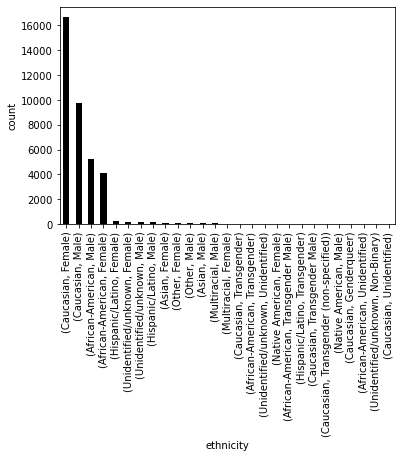

In [27]:
ethnicity_df2.groupby(['CRISIS Demographics - Ethnicity', 'CRISIS Demographics - Gender Identity'])['CallReportNum'].count().sort_values(ascending=False).plot.bar(color='black',legend=None, tick_label='Plain')
plt.ylabel('count')
plt.xlabel('ethnicity')

In [38]:
gen_stat = ethnicity_df2.query("'Gender Identity' == 'Male'")
sns.lineplot(data=male_ethnicity_df2, x="count", y="gender")

KeyError: False

In [21]:
ethnicity_df = SHL['CRISIS Demographics - Ethnicity'].notnull()
ethnicity_df = SHL[ethnicity_df]
ethnicity_df

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Demographics - Date of Birth,CRISIS Demographics - Exact Age,CRISIS Demographics - Occupation,CRISIS Demographics - Suffix,...,CRISIS Demographics - Ethnicity,CRISIS Demographics - Gender Identity,CRISIS Demographics - Goal 5 Progress,CRISIS Demographics - Has a disability?,CRISIS Demographics - Homeless?,CRISIS Demographics - Income,CRISIS Demographics - Is working?,CRISIS Demographics - Marital Status,CRISIS Demographics - Military,CRISIS Demographics - Was the outcome of this call Successful or Unsuccessful?
2,96626654,12/31/2021 23:07,12/31/2021 23:28,21,1030262,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Single,N/A (did not serve),NaN
3,96626370,12/31/2021 22:45,12/31/2021 22:55,10,2479348,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,Yes,No,NaN,NaN,Divorced,N/A (did not serve),NaN
6,96625344,12/31/2021 21:40,12/31/2021 22:01,21,2003009,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,PT employment,NaN,Single,Unknown,NaN
7,96625140,12/31/2021 21:27,12/31/2021 21:39,12,1033478,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,Yes,No,NaN,NaN,Single,Veteran,NaN
9,96624680,12/31/2021 21:02,12/31/2021 21:23,21,4738962,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Male,NaN,NaN,NaN,NaN,NaN,NaN,N/A (did not serve),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10599,96763278,1/4/2022 18:54,1/4/2022 19:13,19,-1,NaN,NaN,NaN,NaN,NaN,...,African-American,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10602,96762061,1/4/2022 18:21,1/4/2022 18:31,10,3769693,NaN,NaN,NaN,NaN,NaN,...,African-American,Male,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10604,96761721,1/4/2022 18:12,1/4/2022 18:34,22,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN
10607,96758100,1/4/2022 16:45,1/4/2022 16:55,10,-1,NaN,NaN,NaN,NaN,NaN,...,Caucasian,Female,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN


Text(0.5, 0, 'ethnicity')

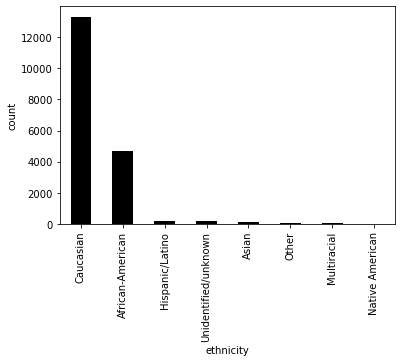

In [22]:
ethnicity_df.groupby(['CRISIS Demographics - Ethnicity'])['CallReportNum'].count().sort_values(ascending=False).plot.bar(color='black',legend=None, tick_label='Plain')
plt.ylabel('count')
plt.xlabel('ethnicity')

In [23]:
ethplt = ethnicity_df.groupby(['CRISIS Demographics - Ethnicity'])['CallReportNum'].count().sort_values(ascending=False).to_frame()

In [24]:
ethplt

,CallReportNum
CRISIS Demographics - Ethnicity,
Caucasian,13320
African-American,4711
Hispanic/Latino,178
Unidentified/unknown,150
Asian,92
Other,74
Multiracial,41
Native American,6


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

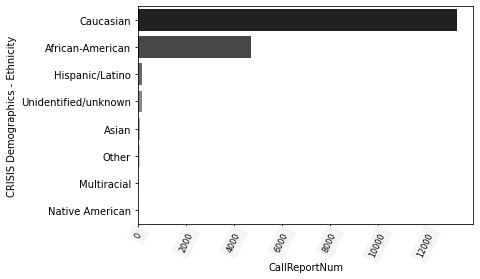

In [25]:
ethplt = ethnicity_df.groupby(['CRISIS Demographics - Ethnicity'])['CallReportNum'].count().sort_values(ascending=False).to_frame()
ethplt.reset_index(inplace=True)
ax = sns.barplot(y=ethplt['CRISIS Demographics - Ethnicity'], x=ethplt['CallReportNum'], data=ethplt, palette="Greys_r", edgecolor='none')
#ax.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation=65, fontsize=8, backgroundcolor='whitesmoke')

ax = phoneline.plot(kind='bar', figsize=(7,5), xlabel='Phone Line', ylabel='Call Volume', rot=0, color=['#440154', '#3B528B', '#21918C'])
ax.legend(title='Call Year', bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(rotation=60)
plt.tight_layout()
plt.savefig('Annual Call Volume by Phone Line')
plt.show();
#caitlins code

In [ ]:
ethplt.reset_index(inplace=True)
ax = sns.barplot(x=ethplt['CRISIS Demographics - Ethnicity'], y=ethplt['CallReportNum'], data=ethplt, palette="Greys_r", edgecolor='none')
ax.ticklabel_format(style='plain', axis="y")
plt.xticks(rotation=65, fontsize=8, backgroundcolor='whitesmoke')
plt.ylabel('count', fontweight='bold', fontsize=11)
plt.xlabel('ethnicity',fontweight='bold',fontsize=11, labelpad=12)

In [ ]:
print(sns.get_dataset_names())

In [ ]:
sns.distplot(ethnicity_df['CRISIS Demographics - Ethnicity'])

ethplt2 = ethnicity_df.groupby(['CRISIS Demographics - Ethnicity'])['CRISIS Demographics - Gender Identity'].count().sort_values(ascending=False).to_frame()
ethplt2.reset_index(inplace=True)
sns.set(style="whitegrid")
ethplot = sns.load_dataset('#')
ethplot = sns.swarmplot(x='Ethnicity', y='Gender Identity', data=#)
plt.title('Graph')
plt.show()
#trying to understand what i am doing wrong here, the error reads ethnicity_df not an example dataset